In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Q1Data.csv')
df

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_9,MFCCs_10,...,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,Family,Genus,Species
0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,0.188654,...,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre
1,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,0.270958,...,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre
2,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,0.266064,...,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre
3,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,0.267279,...,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre
4,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,0.332695,...,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,0.065905,...,-0.000861,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber
7191,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,0.038545,...,0.006457,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber
7192,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,0.062748,...,0.008696,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber
7193,-0.519497,-0.307553,-0.004921,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,0.049792,...,0.001924,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber


In [3]:
target = df['Genus'].astype('category')
features = df.drop(['Genus', 'Species','Family'], axis = 1)
features_dt = features.iloc[:,:6]

In [4]:
classes, counts = np.unique(df['Genus'], return_counts = True)
genuses = dict(zip(classes, counts))
genuses

{'Adenomera': 4150,
 'Ameerega': 542,
 'Dendropsophus': 310,
 'Hypsiboas': 1593,
 'Leptodactylus': 270,
 'Osteocephalus': 114,
 'Rhinella': 68,
 'Scinax': 148}

In [7]:
x_train, x_test, y_train, y_test = train_test_split(features_dt, target, test_size=0.80, random_state=42)

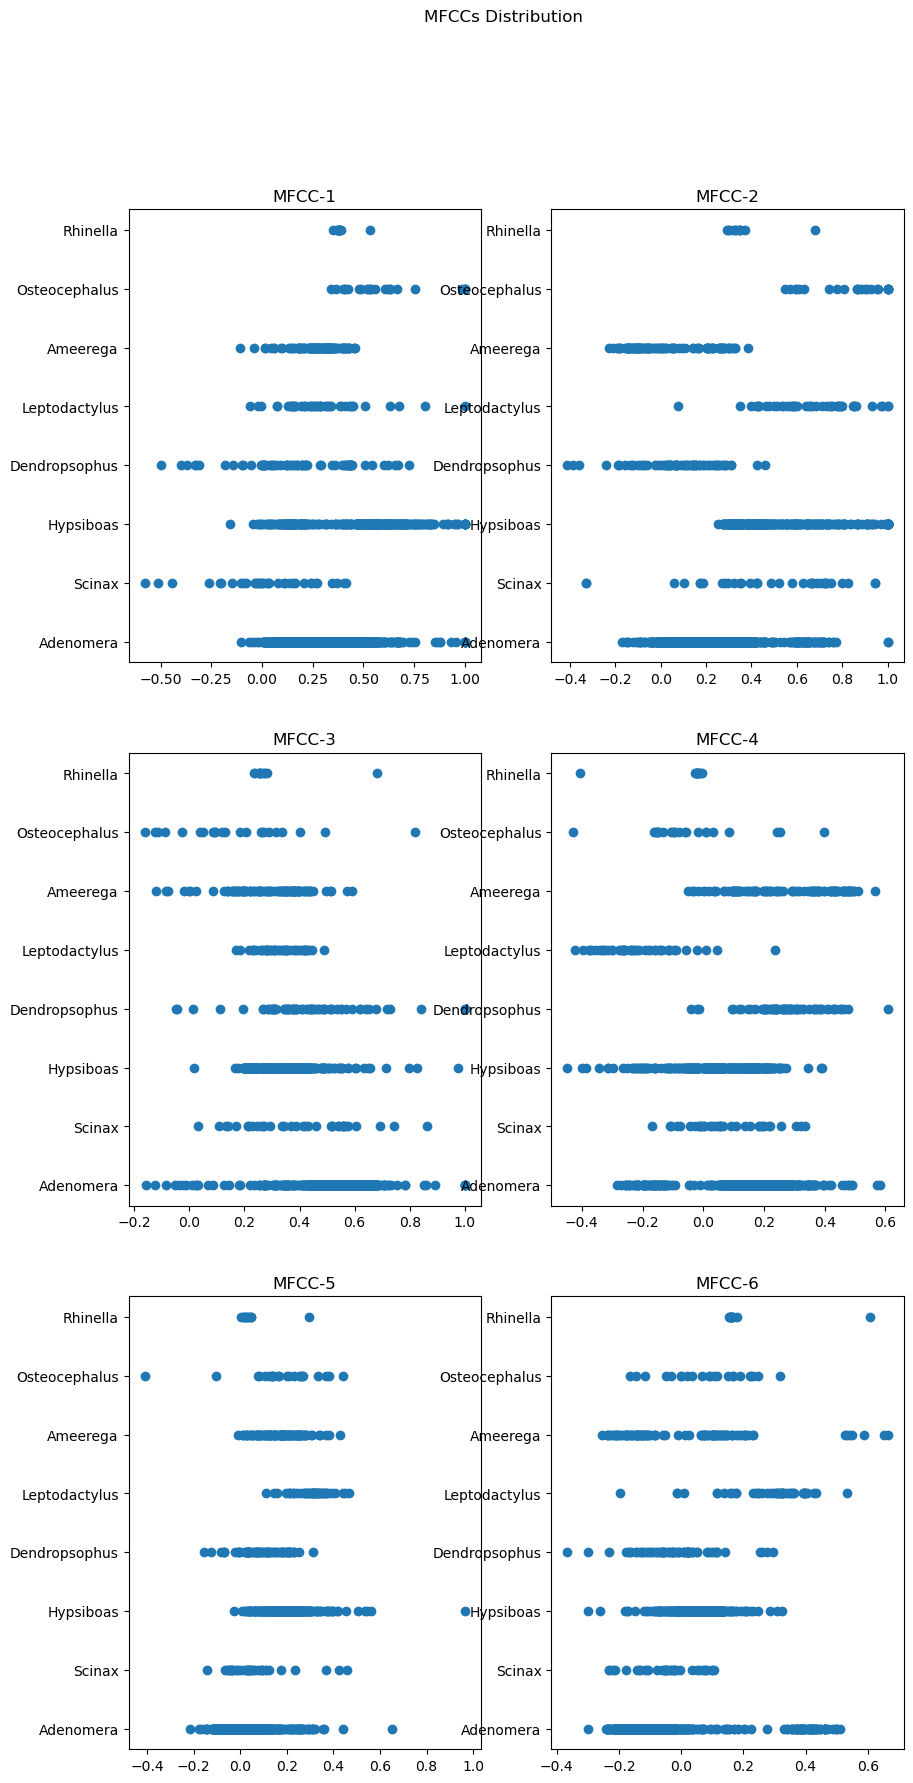

In [8]:
fig, axs = plt.subplots(3,2, figsize=(10, 20))
for row in range(3):
    for col in range(2):
        x = x_train.iloc[:, 2*row+col]
        axs[row, col].scatter(x, y_train)
        axs[row, col].set_title(f"MFCC-{2*row+col+1}")
fig.suptitle("MFCCs Distribution")
plt.show()

In [9]:
import copy
class DecisionTree:
    def __init__(self,class_counts, criterion = 'entropy',max_depth = 1):
        self.max_depth = max_depth
        self.criterion = criterion
        self.currl = 0
        self.classes = {label: index for index,label in enumerate(class_counts)}
        self.initial_node = {
            'level': 0,
            'parent': -1,
            'entropy': -1,
            'split_feature': '',
            'split_value': '',
            'values_index': [],
            'class_counts': []
        }
        self.nodes = [self.initial_node]
    
    def entropy(self, class_counts):
        if(len(class_counts) == 0 or np.sum(class_counts > 0) <= 1):
            return 0.0
        data = copy.deepcopy(class_counts)
        data[data == 0] = 0.000001
        counts = np.sum(data)
        data = data / counts
        return -np.sum(data*np.log2(data))
        
    def fit(self,x,y):
        self.x_train = x if isinstance(x, pd.DataFrame) else pd.DataFrame(x)
        self.y_train = y if isinstance(y, pd.DataFrame) else pd.DataFrame(y)
        classes, counts = np.unique(self.y_train, return_counts = True)
        self.initial_node['values_index'] = self.x_train.index
        self.initial_node['class_counts'] = np.array(list(counts))
        curr_index = 0
        max_nodes = 2**(self.max_depth+1)
        while(curr_index < max_nodes):
            currn = self.nodes[curr_index]
            currn['entropy'] = self.entropy(currn['class_counts'])
            min_entropy = (np.inf,'',-1,[])
            
            
            if(currn['entropy'] == 0.0 or currn['level'] == self.max_depth):
                self.nodes.append({'class_counts': []})
                self.nodes.append({'class_counts': []})
                curr_index += 1
                continue
            
            x = self.x_train.loc[currn['values_index']]
            y = self.y_train.loc[currn['values_index']]
            
            
            for split_name in self.x_train.columns:
                feature = x[split_name].sort_values()
                classes = y.loc[feature.index]['Genus']
                split1c = np.zeros(len(self.classes))
                
                for datapoint, val in zip(feature, classes):
                    split1c[self.classes[val]] += 1
                    split2c = currn['class_counts'] - split1c
                    h1 = self.entropy(split1c)
                    h2 = self.entropy(split2c)
                    H = (split1c.sum() / currn['class_counts'].sum())*h1 + (split2c.sum() / currn['class_counts'].sum())*h2
                    if H < min_entropy[0]:
                        min_entropy = (H, split_name, datapoint,copy.deepcopy(split1c))
                        
            currn['split_feature'] = min_entropy[1]
            currn['split_value'] = min_entropy[2]
            
            lchild = copy.deepcopy(self.initial_node)
            lchild['parent']= curr_index
            lchild['level'] = currn['level']+1
            lchild['values_index'] = x[x[min_entropy[1]] <= min_entropy[2]].index
#             lchild['class_counts'] = min_entropy[3]
            lchild['class_counts'] = np.array([np.count_nonzero(y.loc[lchild['values_index']]['Genus'] == key) for key in self.classes])
            self.nodes.append(lchild)
            
            rchild = copy.deepcopy(self.initial_node)
            rchild['parent'] = curr_index
            rchild['level'] = currn['level']+1
            rchild['values_index'] = x[x[min_entropy[1]] > min_entropy[2]].index
            rchild['class_counts'] = currn['class_counts'] - lchild['class_counts']
#             rchild['class_counts'] = [np.count_nonzero(y.loc[rchild['values_index']]['Genus'] == key) for key in self.classes]
            self.nodes.append(rchild)
            
            curr_index += 1
                
    def predict(self, x):        
        predictions = []
        classes_list = list(self.classes)
        
        for index, dpoint in x.iterrows():
            curr_index = 0
            while(curr_index < len(self.nodes)):
                if(self.nodes[curr_index]['entropy'] == 0 or self.nodes[curr_index]['level'] == self.max_depth):
                    break
                split_feature = self.nodes[curr_index]['split_feature']
                split_value = self.nodes[curr_index]['split_value']
                temp = 0
                if dpoint[split_feature] <= split_value:
                    temp = 2*curr_index+1
                else:
                    temp = 2*curr_index+2
                
                if temp < len(self.nodes):
                    curr_index = temp
                else:
                    break
            predictions.append(classes_list[np.argmax(self.nodes[curr_index]['class_counts'])])
        
        return predictions
            
                
        
        

In [36]:
x_train, x_test, y_train, y_test = train_test_split(features_dt, target, test_size=0.80, random_state=42)

In [10]:
accuracies_dt = []
for depth in range(1,16):
    tree = DecisionTree(genuses, max_depth = depth)
    tree.fit(x_train, y_train)
    predictions = tree.predict(x_test)
    acc= accuracy_score(y_test, predictions)
    print(f"Depth - {depth}, acc - {acc}")
    accuracies_dt.append(acc)

Depth - 1, acc - 0.6926685198054204
Depth - 2, acc - 0.7564280750521195
Depth - 3, acc - 0.8021195274496178
Depth - 4, acc - 0.8288742182070883
Depth - 5, acc - 0.856671299513551
Depth - 6, acc - 0.8754343293954134
Depth - 7, acc - 0.8888116747741487
Depth - 8, acc - 0.8889854065323141
Depth - 9, acc - 0.8917651146629604
Depth - 10, acc - 0.892460041695622
Depth - 11, acc - 0.8917651146629604
Depth - 12, acc - 0.8917651146629604
Depth - 13, acc - 0.8931549687282835
Depth - 14, acc - 0.8931549687282835
Depth - 15, acc - 0.8931549687282835


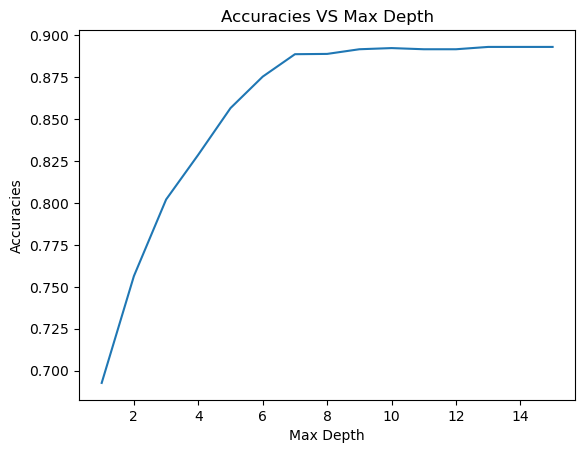

In [11]:
plt.plot(range(1,16), accuracies_dt)
plt.title("Accuracies VS Max Depth")
plt.xlabel('Max Depth')
plt.ylabel('Accuracies')
plt.show()

**Observations**: The Accuracies Increase upto a certain depth after which they become ~constant given the data has been partitioned enough and all the leaf nodes have almost 0 entropies after a certain depth

In [12]:
class KNN :
    def __init__(self, k):
        self.k = k
    
    def fit(self,X,y):
        self.X_train=X
        self.y_train=y

    def predict(self,x_test):
        predictions=[]
        for index,dpoint in x_test.iterrows():
            distances = np.sqrt(np.sum((self.X_train - dpoint) ** 2, axis=1))
            indices = self.X_train.index
            sorted_indices = np.argsort(distances)[:self.k]
            k_indices = indices[sorted_indices]
            nearest_neighbours, counts = np.unique(self.y_train.loc[k_indices], return_counts = True)
            predictions.append(nearest_neighbours[np.argmax(counts)])
            
        return predictions

    def evaluate(self,x_val,y_val):
        predictions=self.predict(x_val)
        accuracy=accuracy_score(y_val,predictions)
        
        recall=recall_score(y_val,predictions,average='weighted', zero_division=0)
        precision = precision_score(y_val, predictions, average='weighted', zero_division=0)
        f1=f1_score(y_val,predictions,average="weighted",zero_division=0)
        return accuracy,recall,precision,f1              

In [13]:
x_, x_test, y_, y_test = train_test_split(features, target, test_size=0.10, random_state=42)
x_, x_train, y_, y_train = train_test_split(x_, y_, test_size= 1/3, random_state=42)

In [14]:
accuracies_knn = []
for k in range(1, 51):
    knn = KNN(k)
    knn.fit(x_train, y_train)
    predictions = knn.predict(x_test)
    acc = accuracy_score(y_test, predictions)
    accuracies_knn.append(acc)

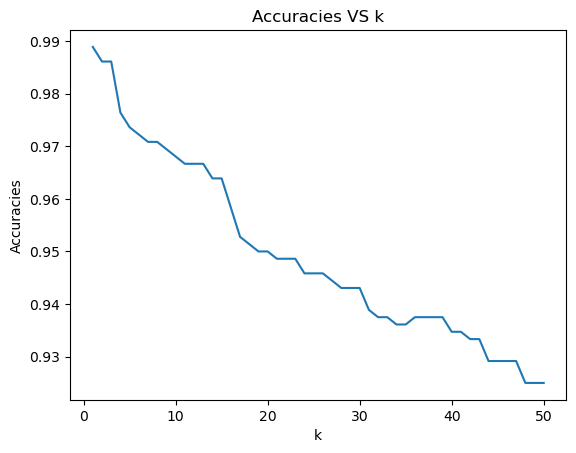

In [15]:
plt.plot(range(1,51), accuracies_knn)
plt.title("Accuracies VS k")
plt.xlabel('k')
plt.ylabel('Accuracies')
plt.show()

**Observations:** The model performs best for K = 1 after which the model Accuracy decreases indicating the nearest neighbours of a data point in the given input space have the same Target label and thus with increasing k the predictions take into account other neighbours which decrease the accuracy

In [22]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=42)

In [17]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

accuracy_dt_sklearn = []
for depth in range(1,16):
    regressor = DecisionTreeClassifier(criterion = 'entropy', max_depth = depth)
    regressor.fit(x_train.values, y_train.values)
    predictions = regressor.predict(x_test.values)
    acc = accuracy_score(y_test, predictions)
    accuracy_dt_sklearn.append(acc)

In [20]:
from sklearn.neighbors import KNeighborsClassifier

accuracy_knn_sklearn = []
for k in range(1,1001):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)  # You can adjust the value of k (n_neighbors)
    knn_classifier.fit(x_train, y_train)
    y_pred = knn_classifier.predict(x_test.values)
    accuracy = accuracy_score(y_test.values, y_pred)
    accuracy_knn_sklearn.append(accuracy)

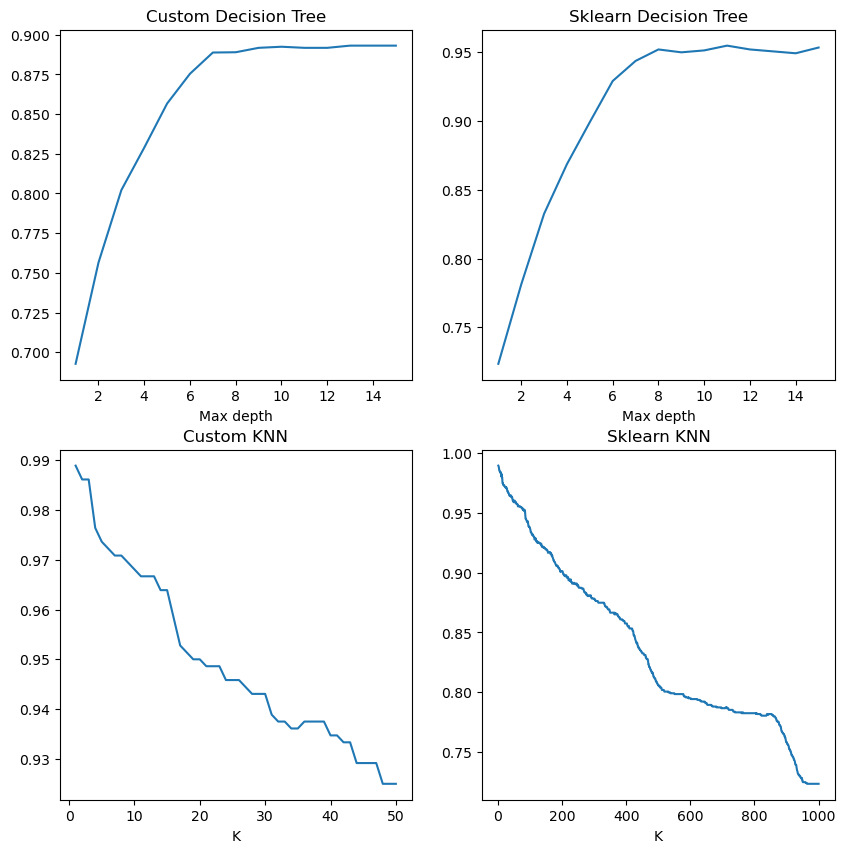

In [21]:
fig, axs = plt.subplots(2,2, figsize = (10, 10))

axs[0,0].plot(range(1,16), accuracies_dt)
axs[0,0].set_xlabel('Max depth')
axs[0,0].set_title('Custom Decision Tree')
axs[0,1].plot(range(1,16), accuracy_dt_sklearn)
axs[0,1].set_xlabel('Max depth')
axs[0,1].set_title('Sklearn Decision Tree')
axs[1,0].plot(range(1,51), accuracies_knn)
axs[1,0].set_xlabel('K')
axs[1,0].set_title('Custom KNN')
axs[1,1].plot(range(1,1001), accuracy_knn_sklearn)
axs[1,1].set_xlabel('K')
axs[1,1].set_title('Sklearn KNN')
plt.show()

The Custom models perform at par with their corresponding Sklearn variants. Difference arises in Speed of computation which is faster for the sklearn models. The predictions, accuracies also are in line for all the models